In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [5]:
train=pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
validate=pd.read_csv("/kaggle/input/Kannada-MNIST/Dig-MNIST.csv")

In [6]:
validate.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_images=train.drop('label',axis =1)
train_labels = train.label
val_images=validate.drop('label',axis=1)
val_labels=validate.label

In [8]:
train_images = train_images/255.0
val_images = val_images/255.0

In [9]:
train_images=train_images.values.reshape(-1,28,28,1)
val_images=val_images.values.reshape(-1,28,28,1)

In [10]:
print('The shape of train set now is',train_images.shape)
print('The shape of test set now is',val_images.shape)

The shape of train set now is (60000, 28, 28, 1)
The shape of test set now is (10240, 28, 28, 1)


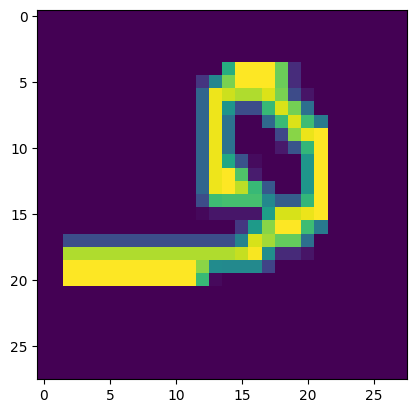

In [19]:
image = train_images[1,:,:,:]
image.shape
plt.imshow(image)
plt.show()

In [12]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
train_labels[0,:]
train_images,test_images,train_labels,test_labels = train_test_split(train_images,train_labels, random_state=0, test_size=0.3)

In [13]:
model = Sequential()

model.add(Conv2D(filters =32,kernel_size =(5,5),padding ='Same',
                 activation ='relu',input_shape =(28,28,1)))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64,kernel_size =(3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=0.1))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters =32,kernel_size =(5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=0.1))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())#np.reval()
model.add(Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,962 (288.91 KB)

 Trainable params: 73,706 (287.91 KB)

 Non-trainable params: 256 (1.00 KB)

In [16]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])
epochs=20
batch_size=64


In [17]:
history = model.fit(train_images,train_labels, batch_size=batch_size, epochs = epochs)

Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8883 - loss: 0.3907
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0394
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0271
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0216
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9952 - loss: 0.0162
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9962 - loss: 0.0123
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9955 - loss: 0.0131
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9954 - loss: 0.0139
Epoch 9/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9972 - loss: 0.0083
Epoch 10/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9972 - loss: 0.0083
Epoch 11/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9975 - loss: 0.0085
Epoch 12/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

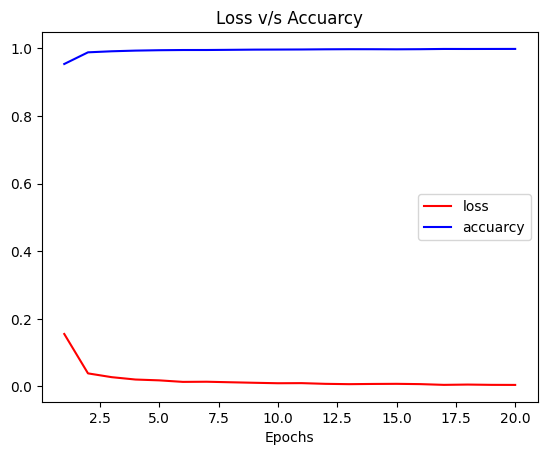

In [21]:
x=range(1,1+epochs)
plt.plot(x,history.history['loss'],color='red',label="loss")
plt.plot(x,history.history['accuracy'],color='blue',label="accuarcy")
plt.legend()
plt.xlabel("Epochs")
plt.title("Loss v/s Accuarcy")
plt.show()

In [22]:
prediction = model.predict(test_images)
prediction

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[7.29556796e-14, 4.43210403e-19, 6.36849821e-16, ...,
        2.13137974e-18, 1.00000000e+00, 1.08902667e-13],
       [6.86500856e-11, 2.71874967e-10, 1.46154720e-11, ...,
        8.60030624e-08, 1.15047579e-13, 6.48179210e-12],
       [1.07841606e-13, 1.93155835e-14, 3.64525458e-11, ...,
        1.31831684e-10, 9.65515848e-14, 1.29521543e-13],
       ...,
       [9.99997377e-01, 5.54351516e-07, 1.65610425e-06, ...,
        2.27762442e-07, 3.28680407e-08, 3.23838706e-10],
       [4.10564459e-13, 6.82907873e-17, 1.27251174e-14, ...,
        1.54251941e-11, 6.93684027e-15, 8.91430864e-06],
       [9.99999881e-01, 9.35572331e-08, 4.16640666e-10, ...,
        8.06159672e-09, 1.77116696e-10, 1.17453174e-11]], dtype=float32)

In [24]:
predictions=[]
for item in prediction:
    result = item.argmax()
    predictions.append(result)

print(predictions[0:10])

[8, 3, 3, 0, 8, 8, 0, 4, 5, 0]


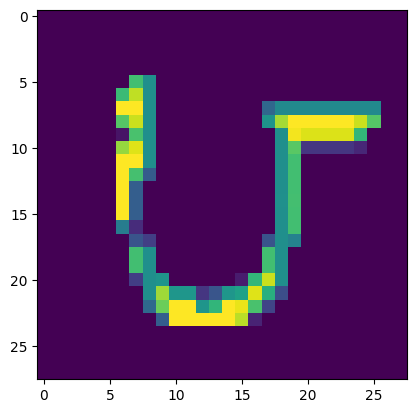

In [25]:
image = test_images[0,:,:,:]
plt.imshow(image)
plt.show()

In [27]:
pred=pd.DataFrame(predictions)
pred

,0
0,8
1,3
2,3
3,0
4,8
...,...
17995,5
17996,5
17997,0
17998,6
